## Introduction

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. It was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster. (https://en.wikipedia.org/wiki/Titanic)

In this file, I will look deeply into the dataset and create a Machine Learning Model to predict the survived passenger. I will try different model and compare them. Also, I will try to find which features have a more impact on our process.


### STEP 0
In this step, we will import some libraries and useful things. After that, getting the data and describe our dataset and Data Exploration/Analysis. 


In [1]:
#some useful library and necessary things
import pandas as pd
import numpy as np 


from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display



In [2]:
#Read data from .csv file

passenger_train = pd.read_csv("train.csv")
passenger_test = pd.read_csv("test.csv")

In [3]:
passenger_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training data set have 891 examples and 11 features + one target values.('Survived'). Features have a different type, 5 of them integers, 5 are objects and 2 are floats. I can give a short description of the features:

In [4]:
#PassengerId:Unique Id of a passenger
#Pclass: Ticket class
#Name:Passenger Name
#Sex: Sex
#Age: Age in years
#Sibsp: # of siblings / spouses aboard the Titanic
#Parch: # of parents / children aboard the Titanic
#Ticket: Ticket Number
#Fare: Passenger Fare
#Cabin: Cabin number
#Embarked: Port of Embarkation

passenger_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This graph shows us our training data set the survival rate is 38.3%. Also, we can see the age range is 0.4 and 80. I will look later for missing values more deeply but we can see that also feature age has missing values.

In [5]:
display(passenger_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As you can see above in our data set we need to convert a lot of features into numeric ones later on for the machine learning algorithm to process them. Also, our numerical values have a different range, we need to set them as similar and close one each other. And the next step, we'll look at our dataset which has missing values.

In [6]:
total=passenger_train.isnull().sum().sort_values(ascending=False)
percent = passenger_train.isnull().sum()/passenger_train.isnull().count()*100
percent_2 = (round(percent, 1))
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The main problems are Cabin and age sections. Embarked has just 2 missing data and we can fill it with ease. 

In [7]:
passenger_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

We have 11 features and one target feature as "Survived". In the next steps, I'll look at which features have most correlated with "Survived". First of all, we will start with "Age" and "Sex".

## Step 1

In this step, as I said before we will look at each feature how they related to the Survived and analysing them on some graph.

### Step1.1 Age and Sex

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Male')

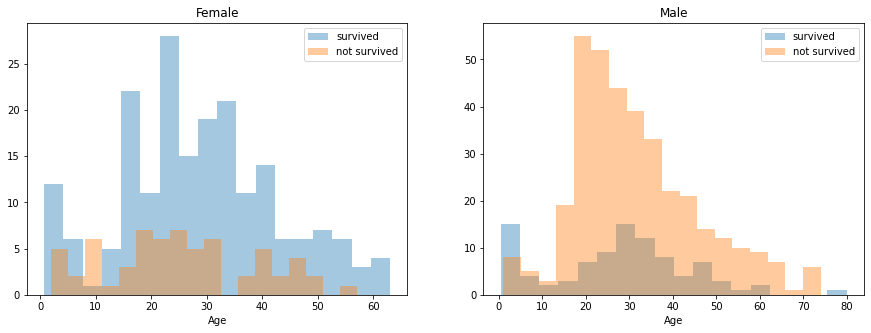

In [8]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
women = passenger_train[passenger_train['Sex']=='female']
men = passenger_train[passenger_train['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label = survived,ax=axes[0],kde = False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=18, label = not_survived,ax=axes[0],kde = False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18, label = survived,ax=axes[1],kde = False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=18, label = not_survived,ax=axes[1],kde = False)
ax.legend()
ax.set_title('Male')

## You can write these ones also in histplot function.
#ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label = survived,ax=axes[0],kde = False,color='r')
#ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=18, label = not_survived,ax=axes[0],kde = False,color='g')
#ax.legend()
#ax.set_title('Female')
#ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18, label = survived,ax=axes[1],kde = False,color='r')
#ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=18, label = not_survived,ax=axes[1],kde = False,color='g')
#ax.legend()
#ax.set_title('Male')

For women passenger, the survival chances are higher between 14 and 40 years old. For men, this is changing. It's around the age of 18 and 30. If you compare both of them, women survival probability is more than men. Women survival probability also high in the age of 5 and 18 but on the other side, it is not the same for men.

### Step 1.2 Embarked,Pclass and Sex

S    644
C    168
Q     77
Name: Embarked, dtype: int64


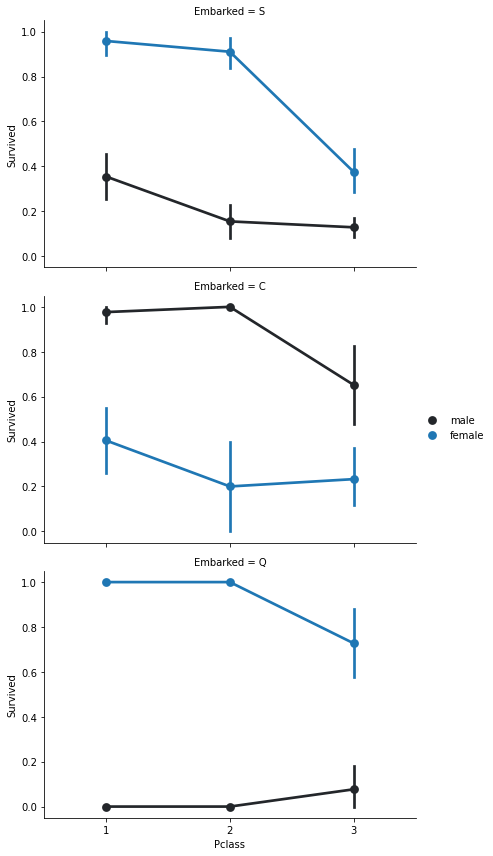

In [9]:
fg = sns.FacetGrid(passenger_train,row='Embarked',height=4,aspect=1.5)
fg.map(sns.pointplot,'Pclass','Survived','Sex',palette= None, order= None, hue_order = None)
fg.add_legend()
"""
S = Southhampton, UK
C = Chebourg, France
Q = Quenstown, Ireland
"""
print(passenger_train['Embarked'].value_counts())

As we can see above graphs, embarked is correlated with survival depending on gender. 

Women on port S and on port Q have a higher chance of survival. On port C, there is less chance of survival. Men on port C a have a higher probability to survive otherwise on port Q and S they have less chance of survival.


### Step 1.3 Pclass
Pclass also seems to be correlated with survival that's why we will plot it.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

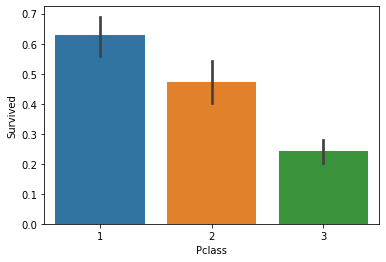

In [10]:
sns.barplot(x='Pclass',y='Survived',data=passenger_train)

As expected the first class have a higher survival chance than the other classes. We'll plot another plot for looking more deeply and understand each class effect on survival.

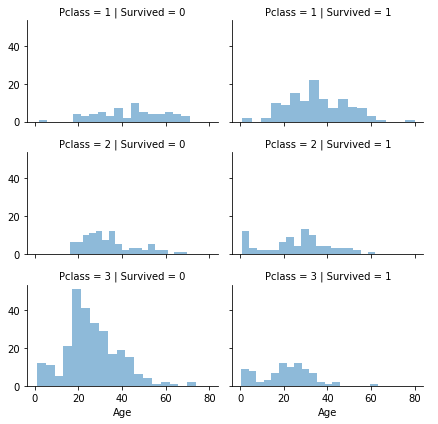

In [11]:
cls= sns.FacetGrid(passenger_train,col='Survived',row='Pclass',height=2,aspect=1.5)
cls.map(plt.hist,'Age',alpha=0.5,bins=18)
cls.add_legend()

These plots also show us about the first-class has more chance of survival, on the other hand, it shows us a third-class high probability to not survived.

### Step 1.4 SibSp and Parch

These two features would make more sense as combined, it will show us the total number of relatives, a person has on the Titanic.

In [12]:
data = [passenger_train,passenger_test]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
    dataset.loc[dataset['relatives'] > 0 , 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    #dataset['not_alone'] = dataset['not_alone'].astype(int)
passenger_train['not_alone'].value_counts()
# Sıfır yalnız insanları gösterir 

1.0    537
0.0    354
Name: not_alone, dtype: int64

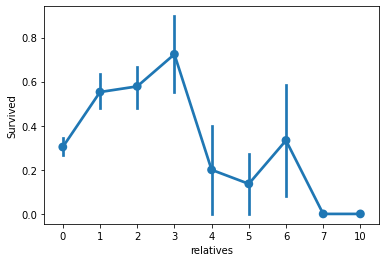

In [13]:
axes = sns.pointplot(x='relatives',y='Survived',data=passenger_train,height=4.5,aspect=1.5)
## axes = sns.factorplot(x='relatives',y='Survived',data=passenger_train,height=5,aspect=1.5)

The above plotting shows us, you had a high probability of survival with 1 to 3 relatives and if you had less than 1 or more than 3 that probability is less.

## Step 2 Data Preprocessing

Before the starting analysis of our data, firstly, we need to look at the dataset. In our dataset, we don't need to use PassengeId, that's why we will drop it. After that, we'll focus on missing data that are classified before it. We have missing data on Cabin(687), Embarked(2) and Age(177). I decided to delete also Cabin. If we have missing values on features, we'll fix it.

In [14]:
passenger_train = passenger_train.drop(['PassengerId','Cabin'],axis=1)

### Step2.1 Age

In [15]:
data = [passenger_train,passenger_test]

for dataset in data:
    mean = passenger_train["Age"].mean()
    std = passenger_test["Age"].std()
    a = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand = np.random.randint(mean-std,mean+std,size=a)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]=rand
    dataset["Age"]=age_slice
    dataset["Age"]=passenger_train["Age"].astype(int)
passenger_train["Age"].isnull().sum()

0

### Step2.2 Embarked
Just 2 missing values on this one. I will just fill these with the most common ones.

In [16]:
passenger_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
common='S'
data = [passenger_train,passenger_test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common)
passenger_train["Embarked"].isnull().sum()

0

### Step 2.3 Convert Features
We will fix our dataset and now we need to change our features type. For the machine learning model, we need to have all datatype as an integer. In this step, we will convert to features integer. Name, Sex, Ticket and Embarked type of "Object". Also Fare and not_alone converting from float to integer.

In [18]:
passenger_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [19]:
# Fare and not_alone float to int

data = [passenger_train,passenger_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['not_alone'] = dataset['not_alone'].fillna(0)
    dataset['not_alone'] = dataset['not_alone'].astype(int)

### Step 2.3.1 Name
We'll change to Name as a Title. So that we can build a new feature.


In [20]:
data = [passenger_train,passenger_test]

# 
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(pat ='([A-Za-z]+)\.',expand=False)
    
pd.crosstab(passenger_train['Title'],passenger_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
# replace titles with a more common title or as Rare
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dona',\
                                                'Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
passenger_train[['Title','Survived']].groupby(['Title']).mean()


,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [22]:
titles = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4}
for dataset in data:
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
passenger_train = passenger_train.drop(['Name'], axis=1)
passenger_test = passenger_test.drop(['Name'], axis=1)

In [23]:
passenger_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,2
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,1
3,1,1,female,35,1,0,113803,53,S,1,0,2
4,0,3,male,35,0,0,373450,8,S,0,1,0


### Step 2.3.2 Sex 
Now in this step, we will convert the sex feature as an integer. 0 or 1. Male is 0 and Female is a 1.

In [24]:
genders = {"male":0,"female":1}
data = [passenger_train,passenger_test]

for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

### Step 2.3.3 Ticket

In [25]:
passenger_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

681 values are unique on this dataset, that's why it would be diffucult the classify them. We will drop it.

In [26]:
passenger_train = passenger_train.drop(['Ticket'],axis=1)
passenger_test = passenger_test.drop(['Ticket'],axis=1)

### Step 2.3.4 Embarked 
Convert 'Embarked' into numeric values.

In [27]:
ports = {'S':0,'C':1,'Q':2}
data = [passenger_train,passenger_test]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

In [28]:
passenger_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,0,22,1,0,7,0,1,0,0
1,1,1,1,38,1,0,71,1,1,0,2
2,1,3,1,26,0,0,7,0,0,1,1
3,1,1,1,35,1,0,53,0,1,0,2
4,0,3,0,35,0,0,8,0,0,1,0


## Step 3 - Setting Categories

Now our all features numeric values but some of them have huge range difference. Such as feature age range is from 0.4 to 80. For a machine learning model, we need to have a similar range of difference about all features. In this step, we will update our features(Age and Fare) as like that

### Step3.1 Age 

According to distirubution we will grouping age feature as a 7 different group. (0-10 = 0) & (11-18 = 1) & ( 19-22 = 2) & ( 23-27 = 3) & ( 28-33 = 4) & ( 34-40 = 5) & (40-... = 6)

In [29]:
data = [passenger_train,passenger_test]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=10,'Age']=0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <=18),'Age']=1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <=22),'Age']=2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <=27),'Age']=3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <=33),'Age']=4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <=40),'Age']=5
    dataset.loc[(dataset['Age'] > 40) ,'Age']=6

passenger_train['Age'].value_counts()

4    166
6    161
5    155
3    139
2    113
1     93
0     64
Name: Age, dtype: int64

### Step3.1 Fare
Also in this feature, we have a very different range. Titanic has offered a different type of ticket and according to them, we have ticket class and fare. That's dor better solution we also need to group our fare features like age. According to distribution we will grouping age feature as a 6 different group (0-7.91$ = 0) & (>7.91$-15$ = 1) & (>15$ - 31$ = 2) & (>31$-99$ = 3) & (>99$-250$ = 4) & (>250$-.. = 5) 

In [30]:
data = [passenger_train,passenger_test]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare']<=15), 'Fare' ]= 1
    dataset.loc[(dataset['Fare']>15) & (dataset['Fare']<=31),'Fare']= 2 
    dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99),'Fare']= 3
    dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250),'Fare'] =4
    dataset.loc[(dataset['Fare']>250),'Fare'] =5
dataset['Fare']=dataset['Fare'].astype(int)

In [31]:
passenger_train["Fare"].describe()

count    891.000000
mean       1.492705
std        1.250933
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Fare, dtype: float64

In [32]:
#Before the starting machine learning models, let's take a last look at or trainin dataset
passenger_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,3.525253,0.523008,0.381594,1.492705,0.361392,0.904602,0.602694,0.728395
std,0.486592,0.836071,0.477990,1.851262,1.102743,0.806057,1.250933,0.635673,1.613459,0.489615,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,5.000000,2.000000,10.000000,1.000000,4.000000


We have 11 features as you can see above. All of them an integer and have a close range.

## Step 4 Machine Learning Models 

In this part, we will train 3 models and compare their results. Firstly, we need to drop survived features on our training dataset. Because the dataset does not provide labels for their testing set, we used the predictions on the training set to compare the algorithms with each other. Also, drop the passenger Id and cabin on test data.

In [33]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


In [34]:
X_train = passenger_train.drop("Survived",axis=1)
Y_train = passenger_train["Survived"]
X_test = passenger_test.drop(["PassengerId","Cabin"],axis=1).copy()

In [35]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,3,0,2,1,0,0,0,1,0,0
1,1,1,5,1,0,3,1,1,0,2
2,3,1,3,0,0,0,0,0,1,1
3,1,1,5,1,0,3,0,1,0,2
4,3,0,5,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,0,1,4
887,1,1,2,0,0,2,0,0,1,1
888,3,1,3,1,2,2,0,3,0,1
889,1,0,3,0,0,2,1,0,1,0


In [36]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,3,0,2,0,0,0,2,0,1,0
1,3,1,5,1,0,0,0,1,0,2
2,2,0,3,0,0,1,2,0,1,0
3,3,0,5,0,0,1,0,0,1,0
4,3,1,5,1,1,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
413,3,0,4,0,0,1,0,0,1,0
414,1,1,6,0,0,4,1,0,1,4
415,3,0,5,0,0,0,0,0,1,0
416,3,0,5,0,0,1,0,0,1,0


Our test data have 418 rows × 10 columns. Train data have 891 rows × 10 columns. The target feature is 'Survived'.

## Logistic Regression
Firstly, we will train our model for logistic regression.

In [37]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)

Y_predict = logr.predict(X_test)
accuary_log = round(logr.score(X_train,Y_train)*100,2)
print(f"Logistic regression has a {accuary_log}% accuary.")

Logistic regression has a 81.03% accuary.


## Stochastic Gradient Descent
Secondly, we will train our model for Stochastic Gradient Descent.

In [38]:
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_predict=sgd.predict(X_test)

sgd.score(X_train,Y_train)
accuary_sgd = round(sgd.score(X_train,Y_train)*100,2)
print(f"Stochastic Gradient Descent has a {accuary_sgd}% accuary.")

Stochastic Gradient Descent has a 78.68% accuary.


## Random Forest 
Finally, we will train your model for Random forest.

In [39]:
randomF = RandomForestClassifier(n_estimators=100)
randomF.fit(X_train,Y_train)

Y_prediction = randomF.predict(X_test)
randomF.score(X_train,Y_train)
accuary_randomF = round(randomF.score(X_train,Y_train)*100,2)

print(f"Random Forest has a {accuary_randomF}% accuary.")

Random Forest has a 91.25% accuary.


In [40]:
# We can show all result on a table, we can compare easily our result
results = pd.DataFrame({'Model': ['Logistic Regression','Stoachastic Gradient Descent','Random Forest'],
                       'Score': [accuary_log,accuary_sgd,accuary_randomF ]})

resultdf = results.sort_values(by='Score',ascending = False)

resultdf = resultdf.set_index('Score')
resultdf.head()

,Model
Score,
91.25,Random Forest
81.03,Logistic Regression
78.68,Stoachastic Gradient Descent


We get the best result on the Random forest model and it is 10% different between the logistic regression. We get a bad result on Stochastic Gradient Descent almost a 12% difference between the best one. Let us check, how random-forest performs, when we use cross validation.  

#### K-fold Cross Validation

In [41]:
# Logistic Regression K-fold Cross Validation
from sklearn.model_selection import cross_val_score
logr = LogisticRegression()
scores = cross_val_score(logr, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
Score_logr = scores.mean()

Scores: [0.8        0.80898876 0.75280899 0.86516854 0.82022472 0.7752809
 0.80898876 0.80898876 0.82022472 0.80898876]
Mean: 0.8069662921348314
Standard Deviation: 0.027822548050596925


In [42]:
## Stoachastic Gradient Descent
sgd = SGDClassifier()
scores = cross_val_score(sgd, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
Score_sgd = scores.mean()

Scores: [0.71111111 0.82022472 0.38202247 0.74157303 0.68539326 0.73033708
 0.7752809  0.65168539 0.79775281 0.79775281]
Mean: 0.7093133583021224
Standard Deviation: 0.1203305914875269


In [43]:
## Random Forest K-Fold Cross Validation

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
Score_rand = scores.mean()

Scores: [0.73333333 0.83146067 0.76404494 0.83146067 0.87640449 0.86516854
 0.84269663 0.78651685 0.82022472 0.83146067]
Mean: 0.8182771535580524
Standard Deviation: 0.04226631171418877


In [44]:
# We can show all K-fold result on a table, we can compare easily our result
results = pd.DataFrame({'Model': ['Logistic Regression','Stoachastic Gradient Descent','Random Forest'],
                       'Score': [Score_logr,Score_sgd,Score_rand ]})

resultdf = results.sort_values(by='Score',ascending = False)

resultdf = resultdf.set_index('Score')
resultdf.head()

,Model
Score,
0.818277,Random Forest
0.806966,Logistic Regression
0.709313,Stoachastic Gradient Descent


These results looks much more better and realistic than firs models. Still random forest is the best one and we can continue with that. Our model has a average accuracy of 82% with a standard deviation of 4%. The standard deviation shows us, how precise the estimates are. This means our model can differ +-4%.

In the next steps, we will try to understand which feature has more important for our models. For this step, we will use the Random Forest model result because we reach the best solution with it and easy to use model.

## Feature Importance


In [45]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(randomF.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Sex,0.2082
Title,0.2021
Age,0.1576
Fare,0.1186
Pclass,0.1183
relatives,0.0643
Embarked,0.0514
SibSp,0.0397
Parch,0.0265


Text(0, 0.5, 'Value')

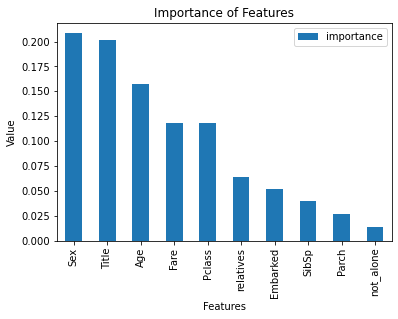

In [46]:
importances.plot.bar()
plt.title('Importance of Features')
plt.xlabel('Features')
plt.ylabel('Value')

As we expect our result has the most correlation between "Title-Sex-Age-Pclass and Fare". On the other hand, Parch and not_alone are not too important for our random forest prediction model. That's why we can drop these two features in the dataset and train again.

In [47]:
passenger_train = passenger_train.drop(['Parch','not_alone','SibSp'],axis=1)
passenger_test = passenger_test.drop(['Parch','not_alone','SibSp'],axis=1)

In [48]:
## Random Forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
Score_rand = scores.mean()

Scores: [0.75555556 0.83146067 0.76404494 0.80898876 0.8988764  0.86516854
 0.84269663 0.78651685 0.82022472 0.82022472]
Mean: 0.8193757802746566
Standard Deviation: 0.04175020452039037


Our random forest model still predicts as well as it did before. A general rule is that the more features you have, the more likely your model will suffer from overfitting and vice versa.